In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
data_df = pd.read_csv("../kham_pha_du_lieu/animals_split_info.csv", index_col = 0)
#                       usecols = ['Name', 'Population trend', 'Population status'])

/home/lexua/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Xu hướng tăng giảm của từng nhóm động vật chia theo nguy cơ tuyệt chủng?

Trả lời được câu hỏi này ta sẽ biết được xu hướng phát triển chung của các loài động vật và của từng nhóm động vật theo phân loại nguy cơ tuyệt chủng. Từ đó có thể biết được các loài bị đe dọa có khả năng hồi phục hay không? Các loài không bị đe dọa liệu đang phát triển tốt hay chỉ đang trên con đường tiến vào nhóm bị đe dọa?
Từ đó suy ra tầm quan trọng của việc bảo tồn động vật.

Nguồn cảm hứng: tự nghĩ ra do tò mò về xu hướng phát triển của động vật và liệu rằng sẽ có một ngày thế giới chỉ còn con người, các loại thịt, da hay lông đều là nhân tạo từ phòng thí nghiệm và nhà xưởng?


In [3]:
def values(col_name, df):
    temp = df[col_name].values.tolist()
    temp = [x for x in temp if type(x) != float]
    temp = np.unique(temp, return_counts=True)
    temp = pd.Series(data = temp[1], index = temp[0])
    return temp

In [4]:
trend = values('Population trend', data_df)
status = values('Population status', data_df)

Đầu tiên ta thực hiện thống kê số lượng loài động vật theo 2 cột này

In [5]:
stat_count = data_df.groupby(['Population trend', 'Population status'])['Name'].count().reset_index(name = 'count')
stat_count = stat_count.sort_values(by=['Population trend', 'Population status'])
stat_count.columns = ['trend', 'status', 'count']
# stat_count

Các loài động vật nằm trong nhóm tuyệt chủng, hoặc tuyệt chủng ngoài tự nhiên có số lượng nhỏ (đều là 1) và ta cũng không cần quan tâm đến xu hướng phát triển của chúng. Vậy nên ta sẽ loại bỏ 2 dòng nói trên.

In [6]:
status = status.drop(labels = ['Extinct in the wild (EW)', 'Extinct (EX)'])
# status

Sau đó ta tạo một dataframe tên "data" với số dòng là kích thước của trend x status

In [7]:
data = pd.DataFrame(index = pd.MultiIndex.from_product([trend.index, status.index])).reset_index()
data.columns = ['trend', 'status']
# data

Ta tiến hành điền dữ liệu đã tính được từ "stat_count" để điền vào "data" và lưu vào "merge_data", các cột trống điền là 0

In [8]:
merge_data = pd.merge(stat_count, data, how = 'right').fillna(0)
# merge_data

### Từng xu hướng phát triển kích thước quần thể chiếm tỉ trọng là bao nhiêu phần trăm?

Text(0.5, 1.0, 'Biểu đồ tỉ trọng xu hướng phát triển về độ lớn của kích thước quần thể')

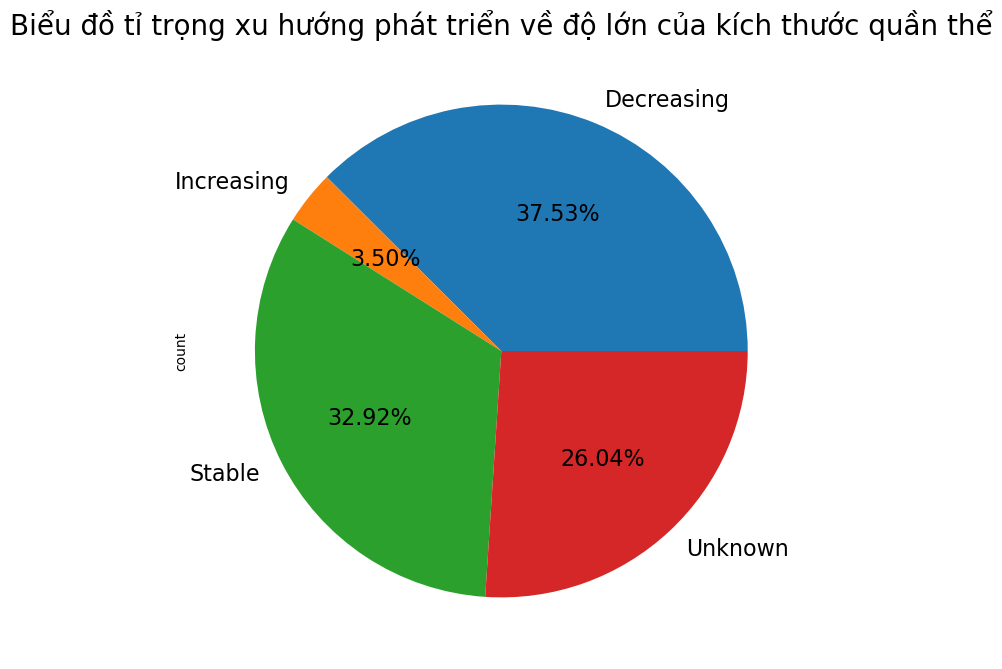

In [9]:
merge_data.groupby(['trend'])['count'].sum().plot(kind = 'pie', autopct='%.2f%%', figsize = (8, 8), fontsize = 16)
plt.title('Biểu đồ tỉ trọng xu hướng phát triển về độ lớn của kích thước quần thể', fontsize = 20)

Nhận xét:
- Số lượng loài có xu hướng giảm chiếm phần lớn tỉ trọng, gấp hơn 10 lần các loài đang có xu hướng tăng. 
- Có thể lí do là vì con người đã gây ra nhiều tác động lên Trái Đất, do sự tăng trưởng dân số và nhu cầu ngày càng tăng của con người, ô nhiễm môi trường và biến đổi khí hậu toàn cầu cũng là những nguyên nhân gián tiếp khiến cho động vật hoang dã bị suy giảm.
- Đây là cảnh báo rất lớn về việc nhiều loài sẽ biến mất trong tương lai, làm ảnh hưởng nghiêm trọng đến đa dạng sinh học và cân bằng trong môi trường, chúng ta nên bảo tồn các loài động vật hoang dã, bảo vệ môi trường cũng như bảo vệ môi trường sống của động vật.

### Theo phân loại trong cột status, từng loại chiếm tỉ trọng bao nhiêu phần trăm

Text(0.5, 1.0, 'Biểu đồ tỉ trọng theo phân loại mức độ bị đe dọa của động vật')

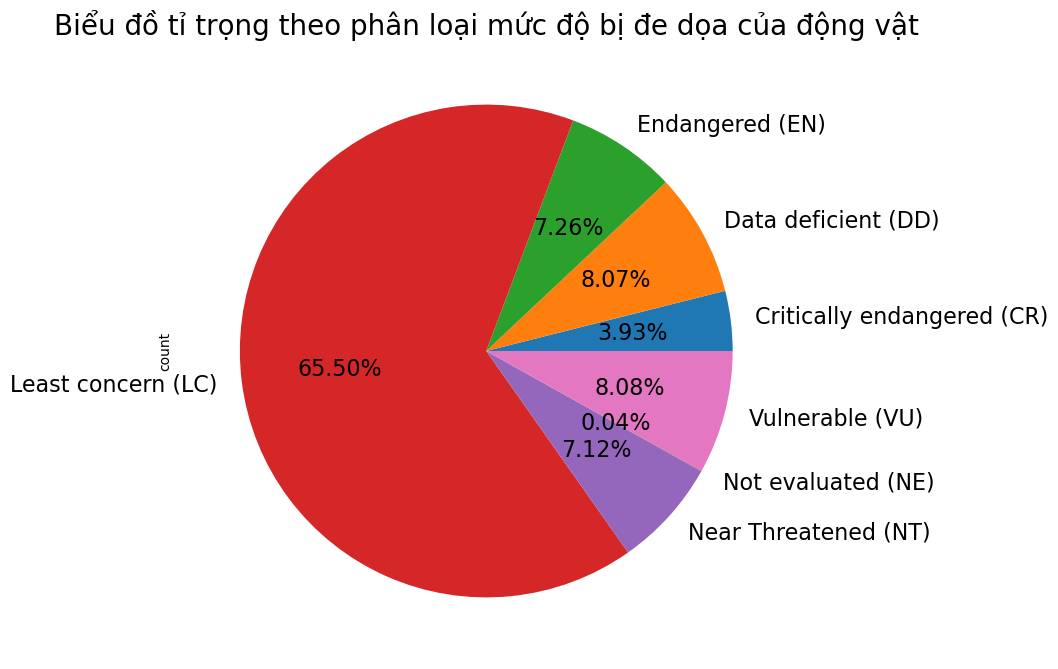

In [10]:
merge_data.groupby(['status'])['count'].sum().plot(kind = 'pie', autopct='%.2f%%', figsize = (8, 8), fontsize = 16)
plt.title('Biểu đồ tỉ trọng theo phân loại mức độ bị đe dọa của động vật', fontsize = 20)

Nhận xét:
- Loài nằm trong nhóm Lower risk: it được quan tâm (LC: 65.27&) hoặc ít bị đe dọa (NT: 7.13%) chiếm tổng tỉ trọng lớn nhất
- Nhóm Not fully assessed: loài thiếu thông tin bao gồm (DD: 8.02%, NE: 0.04%) chiếm tổng tỉ trọng thấp nhất
- Còn lại nằm trong nhóm Threatened: bị đe dọa chiếm dưới 20%

### Ta sẽ biểu diễn tỉ trọng theo từng phân loại trong cột status theo từng xu hướng tăng giảm

Phân loại được lưu trong file "new_status.csv" là một dataframe có 2 cột là "status" và "new_status". Ta tiến hành đọc file và merge với dữ liệu ban đầu để cho ra dữ liệu mới

In [11]:
new_status = pd.read_csv('new_status.csv')
new_status.columns = ['status', 'new_status']
merge_data = pd.merge(merge_data, new_status)
# merge_data

In [12]:
new_status = new_status['new_status'].values.tolist()
new_status = np.unique(new_status)
new_status

array(['Lower risk', 'Not fully assessed', 'Threatened'], dtype='<U18')

Text(0.5, 0.68, 'Biểu đồ tỉ trọng của xu hướng tăng giảm theo phân loại động vật')

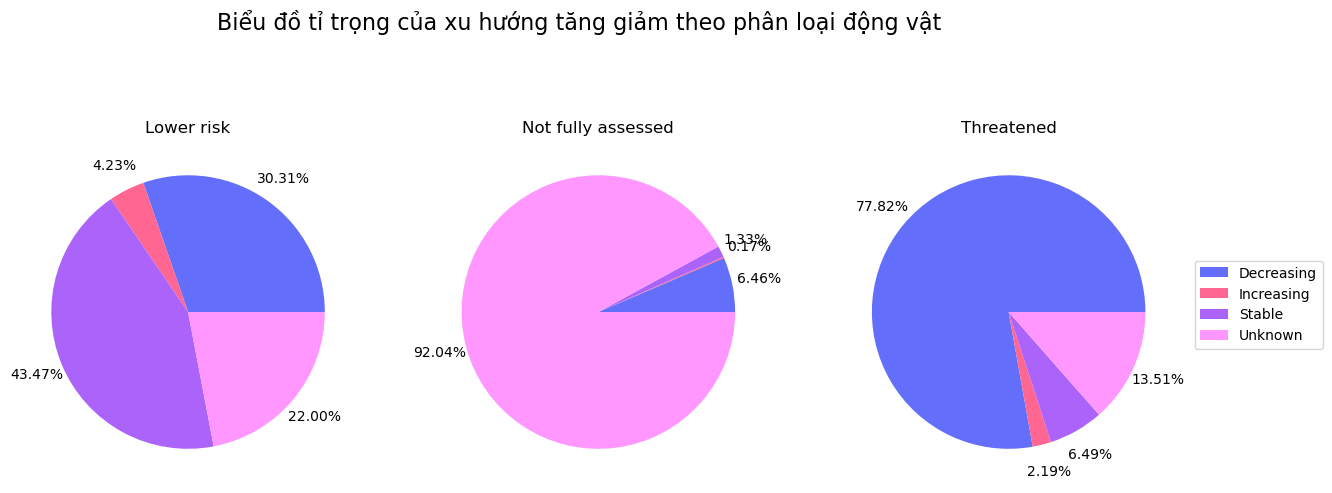

In [14]:
colors = ['#636EFA', '#FF6692', '#AB63FA', '#FF97FF']

fig, ax = plt.subplots(1, 3, figsize = (15, 15))
for i in range(len(new_status)):
    temp = merge_data[merge_data['new_status'] == new_status[i]]
    temp = temp.groupby(['new_status', 'trend'])['count'].sum().reset_index(name = 'sum')
    ax[i].pie(temp['sum'], autopct='%.2f%%', labels = None, pctdistance=1.2, colors = colors)
    ax[i].set_title(new_status[i])
fig.legend(labels = trend.index, loc="right", bbox_to_anchor=(1, 0.5))
fig.suptitle('Biểu đồ tỉ trọng của xu hướng tăng giảm theo phân loại động vật', fontsize = 16, va='bottom', y = 0.68)

Nhận xét:
- Với loài bị đe dọa, 77.82% có xu hướng giảm gấp hơn 30 lần với xu hướng tăng chỉ có 2.32%, điều này đáng để quan tâm do những loài này là những loài sắp phải đối mặt với nguy cơ bị tuyệt chủng, nhưng hầu hết đều lại đang giảm, như vậy chúng ta đang ngày một tiến gần với nguy cơ mất đi đa dạng sinh học, mất cân bằng sinh thái. Ít nhất phải đưa ra được biện pháp bảo vệ hoặc giữ ổn định loài.
- Với loài ít quan tâm (có mức độ bị đe dọa thấp) ta thấy xu hướng giảm chỉ chiếm 30.27% dưới 1/3 tổng số loài và gấp hơn 6 lần đối với loài có xu hướng tăng, cách biệt rất lớn với nhóm bị đe dọa có xu hướng giảm chiếm hơn 3/4. Các loài có sự ổn định cao.
- Loài thiếu thông tin đa phần có xu hướng chưa rõ (hơn 90%), nhưng tỉ lệ giữa loài có xu hướng giảm và tăng vẫn rất cao (gấp gần 30 lần).